<a href="https://colab.research.google.com/github/2004tej/Trend-Detection-for-Top-Cryptocurrencies/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date      Open      High       Low     Close    Volume Currency
0  2020-07-30  0.006671  0.006714  0.006600  0.006631  299089.0      USD
1  2020-07-31  0.006631  0.007549  0.006478  0.007405  393958.0      USD
2  2020-08-01  0.007422  0.012687  0.007174  0.011317  767833.0      USD
3  2020-08-02  0.011339  0.013500  0.010389  0.013464  567497.0      USD
4  2020-08-03  0.013462  0.019296  0.011922  0.017578  805273.0      USD

Missing Values:
 Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


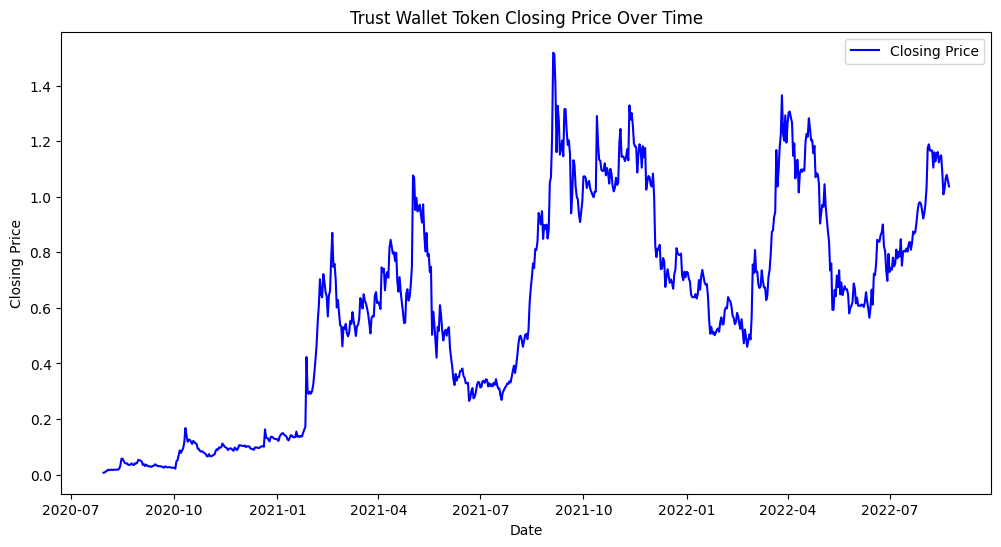

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Trust Wallet Token.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Convert date column to datetime (if applicable)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Basic visualization of closing price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trust Wallet Token Closing Price Over Time')
plt.legend()
plt.show()


         Date      Open      High       Low     Close    Volume Currency
0  2020-07-30  0.006671  0.006714  0.006600  0.006631  299089.0      USD
1  2020-07-31  0.006631  0.007549  0.006478  0.007405  393958.0      USD
2  2020-08-01  0.007422  0.012687  0.007174  0.011317  767833.0      USD
3  2020-08-02  0.011339  0.013500  0.010389  0.013464  567497.0      USD
4  2020-08-03  0.013462  0.019296  0.011922  0.017578  805273.0      USD

Missing Values:
 Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64
Accuracy: 0.9716312056737588

Classification Report:
               precision    recall  f1-score   support

   Downtrend       0.96      0.96      0.96        51
     Uptrend       0.98      0.98      0.98        90

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



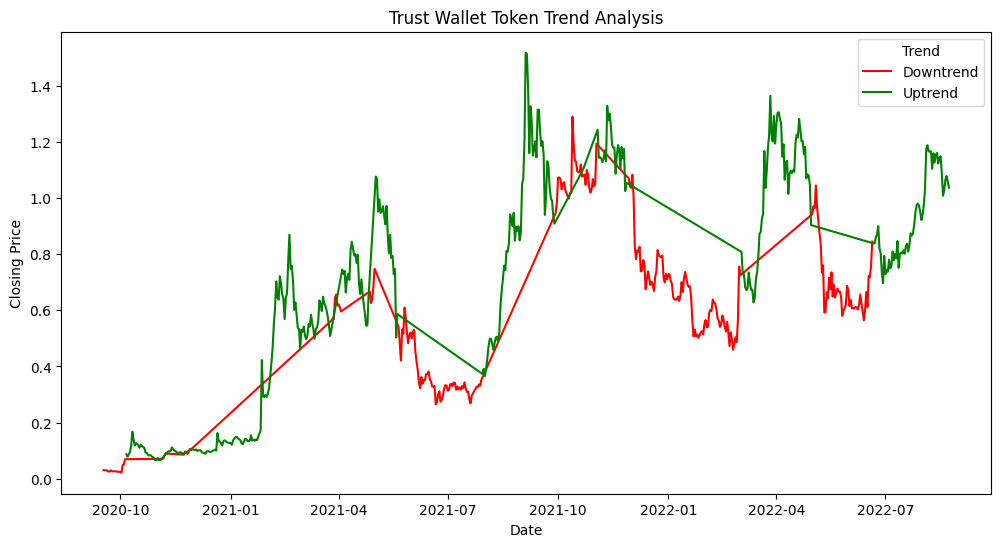

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/Trust Wallet Token.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Feature Engineering - Calculate Moving Averages
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(window=14).mean()))

# Trend Labeling
def classify_trend(row):
    if row['SMA_10'] > row['SMA_50']:
        return 'Uptrend'
    elif row['SMA_10'] < row['SMA_50']:
        return 'Downtrend'
    else:
        return 'Sideways'

df['Trend'] = df.apply(classify_trend, axis=1)

# Data Preparation for Model
df.dropna(inplace=True)
X = df[['SMA_10', 'SMA_50', 'MACD', 'RSI']]
y = df['Trend']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ML Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate Model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close', hue='Trend', palette={'Uptrend':'green', 'Downtrend':'red', 'Sideways':'blue'})
plt.title('Trust Wallet Token Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()
